In [14]:
import os
import sys
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import mixture
from sklearn.model_selection import train_test_split

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [6]:
aitia = App()

In [7]:
df = aitia.data.hepar2_10k_data()

In [30]:
k = 5

In [31]:
gmm = mixture.GaussianMixture(n_components=k)
gmm.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [32]:
print(gmm.converged_)

True


In [11]:
# from https://github.com/whatisAI/Classification_Adds/blob/master/Indeed_JobClassification_GMM.ipynb
def importance_features(k, feature_names,estimator,perc=99.9):
    for ik in range(k):        
        impor_feat = {}
        muik = estimator.means_[ik]
        tth = np.percentile(muik,perc)
        for i,iv in enumerate(muik):
            if iv > tth:
                impor_feat[feature_names[i] ] =  iv 
        sorted_x = sorted(impor_feat.items(), key=operator.itemgetter(1),reverse=True  )
        print('\n \n Important features for cluster ', ik)
        for ii in sorted_x:
             print('{0:<30s}{1}'.format(ii[0],ii[1]))

In [33]:
importance_features(k, list(df), gmm, perc=95)


 
 Important features for cluster  0
Hyperbilirubinemia            3.534865860704111
ggtp                          0.4708857667873635
bilirubin                     0.4119983385168367
sex                           0.31111387490511316

 
 Important features for cluster  1
PBC                           1.2636170790890588
ama                           0.8289859474246184
ESR                           0.5790817800407168
cholesterol                   0.5315803905869878

 
 Important features for cluster  2
Cirrhosis                     2.214572227737508
fibrosis                      1.6511129049554965
Steatosis                     1.220785168962713
carcinoma                     0.7798864577809516

 
 Important features for cluster  3
sex                           0.3808327571143754
ggtp                          0.13024487183582956
pressure_ruq                  0.08985835262586846
pain                          0.060702345726482906

 
 Important features for cluster  4
hbsag_anti              

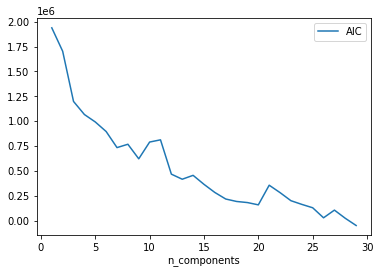

In [24]:
n_components = np.arange(1, 30)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(df)
          for n in n_components]

# plt.plot(n_components, [m.bic(df) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [22]:
target_str_dot = aitia.data.hepar2_graph()

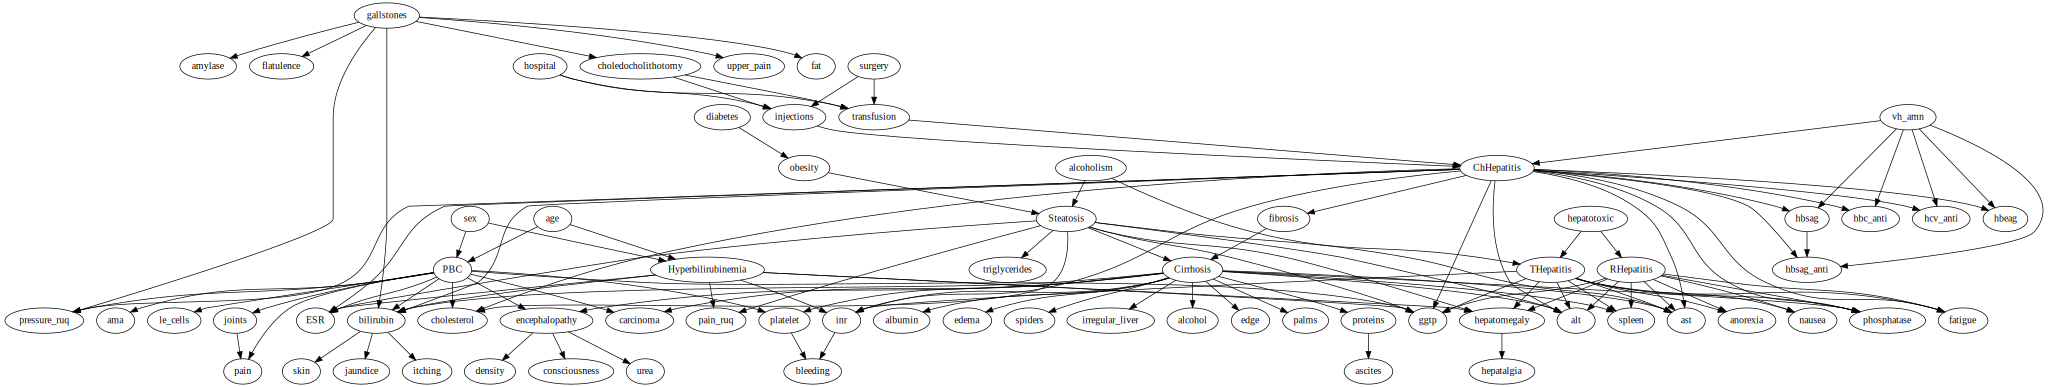

In [23]:
csm = aitia.graph_util.get_causal_graph_from_dot(target_str_dot)
csm.draw()